# Analysis of House sales data in King County

Author: Tisa Yip
***

## Overview

Analysis of King County Real Estate data to predict house prices.



## Business Problem

This information could be used by real estate agencies to evaluate what a property could be currently sold at within King County.


## Data Understanding

The data used in this analysis is from real estate sales of King County. <br>This dataset contains relevant information recent homes sold and their details so there are a good set of variables to base the models on. 

<br>I'll be using price as the target variable in relation to bedrooms, bathrooms, sqft_living, sqft_lot, floors, grade, condition, sqft_living15 and sqft_lot15.

In [1]:
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import numpy as np
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing dataset
df = pd.read_csv('Project2_xi\data\kc_house_data.csv')

In [3]:
from IPython.display import Markdown, display

display(Markdown(r"C:\Users\61405\Documents\Project2\Project2_Xi\data\column_names.md"))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Data Preparation

I checked the database for missing data. <br>I dropped columns which I wouldn't be using for analysis. 
<br>I made these choices to give me a more concise dataframe to work with. 
<br>I removed outliers in the data by capping and flooring price using the inter-quartile range and I removed the outlier in bedrooms because it looks to be a mistake.
<br>I scaled to a STD normal distribution to compare with a log transformation of the dataset for prediction.
<br>I used OLS to capture summary statistics to compare the changes.




In [4]:
# Checking for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df = df.drop(['id','lat','long','view','sqft_above','sqft_basement','yr_renovated','zipcode','date','waterfront','yr_built'], axis=1)

In [6]:
df[df.bedrooms>10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15
8748,520000.0,11,3.00,3000,4960,2.0,3,7,1420,4960
15856,640000.0,33,1.75,1620,6000,1.0,5,7,1330,4700


In [7]:
# create a Boolean mask to remove 33 bedrooms
mask = df['bedrooms'] == 33

# select all rows except the ones that contain '33'
df = df[~mask]

In [8]:
from patsy import dmatrices
    
y, X = dmatrices('price ~ sqft_living + sqft_lot + bedrooms + bathrooms + floors + condition + grade + sqft_living15 + sqft_lot15', data=df, return_type='dataframe')

In [9]:
df_STD = df

In [10]:
df_STD['price'].quantile(0.10)
df_STD['price'].quantile(0.90)

887000.0

In [11]:
df_STD["price"] = np.where(df_STD["price"] <245000.0, 245000.0,df_STD['price'])
df_STD["price"] = np.where(df_STD["price"] >887000.0, 887000.0,df_STD['price'])

In [12]:
df = df.drop(['sqft_lot','floors','condition','sqft_lot15'], axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

In [14]:
df_scaled = s_scaler.fit_transform(df_STD[df_STD.columns])
df_scaled = pd.DataFrame(df_scaled, columns=df_STD.columns)

In [15]:
X_scaled = df_scaled[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15']]

y_scaled = df_scaled[['price']]

In [16]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Xscaled_train, Xscaled_test, yscaled_train, yscaled_test = \
train_test_split(X_scaled, y_scaled, test_size=0.33)

lm_scaled = LinearRegression()
lm_scaled.fit(Xscaled_train, yscaled_train)

LinearRegression()

In [17]:
from statsmodels.regression import linear_model

Xscaled_train = sm.add_constant(Xscaled_train)
sm_ols1 = linear_model.OLS(yscaled_train, Xscaled_train) 
sm_model1 = sm_ols1.fit()

In [18]:
sm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3113.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:03:03   Log-Likelihood:                -15225.
No. Observations:               14469   AIC:                         3.046e+04
Df Residuals:                   14463   BIC:                         3.051e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.006      0.083      0.934      -0.011       0.012
bedrooms         -0.0183      0.007     -2.483      0.013      -0.033      -0.004
bathrooms        -0.0425      0.009     -4.647      0.000      -0.060      -0.025
sqft_living       0.3224      0.012     25.918      0.000       0.298       0.347
grade             0.3753      0.010     38.345      0.000       0.356       0.395
sqft_living15     0.1341      0.009     14.372      0.000       0.116       0.152
==============================================================================
Omnibus:                      436.033   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.286
Skew:                           0.444   Prob(JB):                    3.76e-104
Kurtosis:                       3.007   Cond. No.                         4.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df['sqft_liv_log'] = np.log(df['sqft_living'])
df['sqft_liv15_log'] = np.log(df['sqft_living15'])

df2 = df.drop(['sqft_living','sqft_living15'], axis=1)

df['bedrooms'] = df['bedrooms'].apply(str)
df['bathrooms'] = df['bathrooms'].apply(str)
df['grade'] = df['grade'].apply(str)

bdr_dummies = pd.get_dummies(df['bedrooms'], prefix='bdr', drop_first=True)
bth_dummies = pd.get_dummies(df['bathrooms'], prefix='bth', drop_first=True)
grd_dummies = pd.get_dummies(df['grade'], prefix='grd', drop_first=True)

df2 = df.drop(['bedrooms','bathrooms','grade'], axis=1)
df2 = pd.concat([df2, bdr_dummies, bth_dummies, grd_dummies], axis=1)

In [20]:
df3 = df2.drop(['price'], axis=1)

In [21]:
X1 = df3
y1 = df2[['price']]

X1_train, X1_test, y1_train, y1_test = \
train_test_split(X1, y1, test_size=0.33, random_state=42)

lm1 = LinearRegression()
lm1.fit(X1_train, y1_train)

X1_train1 = sm.add_constant(X1_train)
sm_ols2 = linear_model.OLS(y1_train, X1_train1) 
sm_model2 = sm_ols2.fit()

sm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     381.9
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:03:04   Log-Likelihood:            -1.9169e+05
No. Observations:               14469   AIC:                         3.835e+05
Df Residuals:                   14419   BIC:                         3.839e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.862e+05   1.59e+05     -5.577      0.000    -1.2e+06   -5.75e+05
sqft_living       13.3332      7.342      1.816      0.069      -1.059      27.725
sqft_living15      7.7951      9.953      0.783      0.434     -11.715      27.305
sqft_liv_log    1.448e+05   1.55e+04      9.325      0.000    1.14e+05    1.75e+05
sqft_liv15_log  6.239e+04   2.01e+04      3.102      0.002     2.3e+04    1.02e+05
bdr_10          9361.4668   1.01e+05      0.093      0.926   -1.89e+05    2.07e+05
bdr_11         -5.253e+04   1.38e+05     -0.380      0.704   -3.24e+05    2.19e+05
bdr_2          -1.916e+04   1.33e+04     -1.436      0.151   -4.53e+04    6992.706
bdr_3          -7.182e+04   1.35e+04     -5.311      0.000   -9.83e+04   -4.53e+04
bdr_4          -7.367e+04   1.38e+04     -5.322      0.000   -1.01e+05   -4.65e+04
bdr_5          -7.101e+04   1.44e+04     -4.917      0.000   -9.93e+04   -4.27e+04
bdr_6          -4.266e+04   1.75e+04     -2.441      0.015   -7.69e+04   -8402.694
bdr_7          -5.517e+04   2.88e+04     -1.916      0.055   -1.12e+05    1262.429
bdr_8          -1.996e+04    5.1e+04     -0.391      0.696    -1.2e+05       8e+04
bdr_9           1.279e+05   7.08e+04      1.808      0.071   -1.08e+04    2.67e+05
bth_0.75        5.245e+04   8.19e+04      0.640      0.522   -1.08e+05    2.13e+05
bth_1.0         5.728e+04   7.96e+04      0.720      0.472   -9.87e+04    2.13e+05
bth_1.25        1.833e+05   1.12e+05      1.630      0.103   -3.71e+04    4.04e+05
bth_1.5         3.153e+04   7.98e+04      0.395      0.693   -1.25e+05    1.88e+05
bth_1.75        3.821e+04   7.97e+04      0.479      0.632   -1.18e+05    1.94e+05
bth_2.0         4.197e+04   7.97e+04      0.526      0.599   -1.14e+05    1.98e+05
bth_2.25        1.483e+04   7.98e+04      0.186      0.853   -1.42e+05    1.71e+05
bth_2.5        -1.909e+04   7.97e+04     -0.239      0.811   -1.75e+05    1.37e+05
bth_2.75        3.899e+04   7.99e+04      0.488      0.626   -1.18e+05    1.96e+05
bth_3.0         3.695e+04      8e+04      0.462      0.644    -1.2e+05    1.94e+05
bth_3.25        5.884e+04   8.01e+04      0.735      0.462   -9.81e+04    2.16e+05
bth_3.5         4.391e+04      8e+04      0.549      0.583   -1.13e+05    2.01e+05
bth_3.75        6.834e+04    8.1e+04      0.844      0.399   -9.04e+04    2.27e+05
bth_4.0         5.282e+04    8.1e+04      0.652      0.514   -1.06e+05    2.12e+05
bth_4.25        3.476e+04   8.19e+04      0.424      0.671   -1.26e+05    1.95e+05
bth_4.5         2.065e+04   8.15e+04      0.253      0.800   -1.39e+05     1.8e+05
bth_4.75       -6987.9398   8.65e+04     -0.081      0.936   -1.77e+05    1.63e+05
bth_5.0         -1.79e+04   8.88e+04     -0.202      0.840   -1.92e+05    1.56e+05
bth_5.25        1.793e+04   9.29e+04      0.193      0.847   -1.64e+05       2e+05
bth_5.5     

## Data Modeling
I used sns pairplot with the raw data to see any correlation between the dependant variable (price) and the independant variables.

Q-Q plots, histograms and scatter plots were used to show the OLS models to check normality.

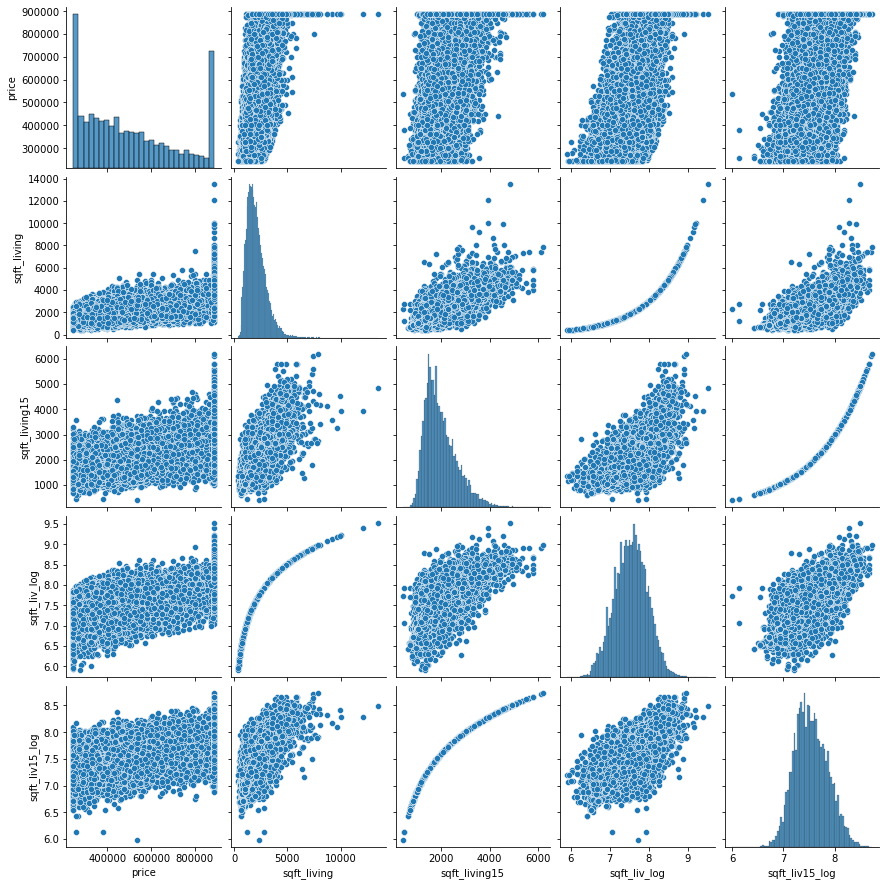

In [22]:
sns.pairplot(df)

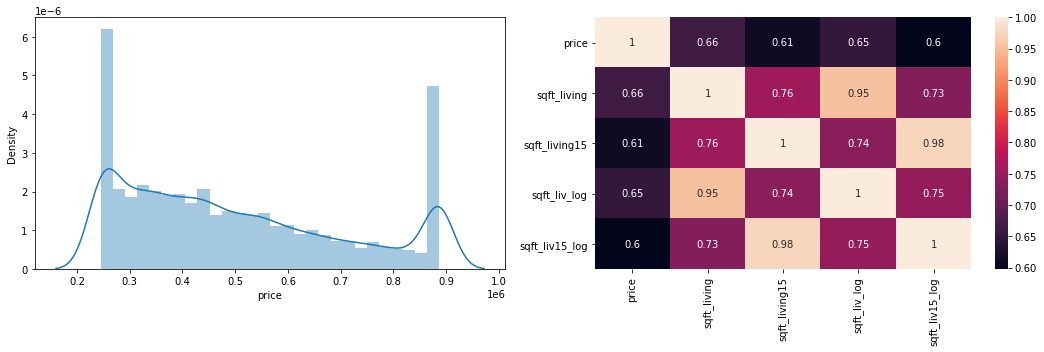

In [23]:
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(df['price'], ax=axs[0])
sns.heatmap(df.corr(), ax=axs[1], annot=True)
fig.tight_layout()

In [24]:
X_train = sm.add_constant(X_train)
sm_ols = linear_model.OLS(y_train, X_train) 
sm_model = sm_ols.fit()

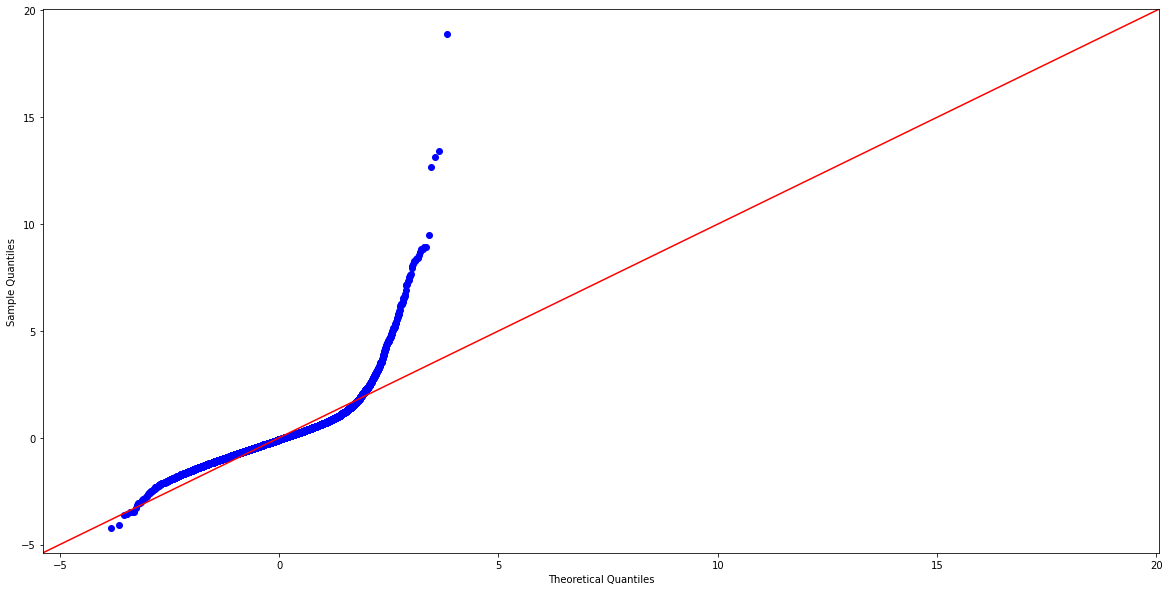

In [25]:
fig = sm.qqplot(sm_model.resid, line='45', fit=True)

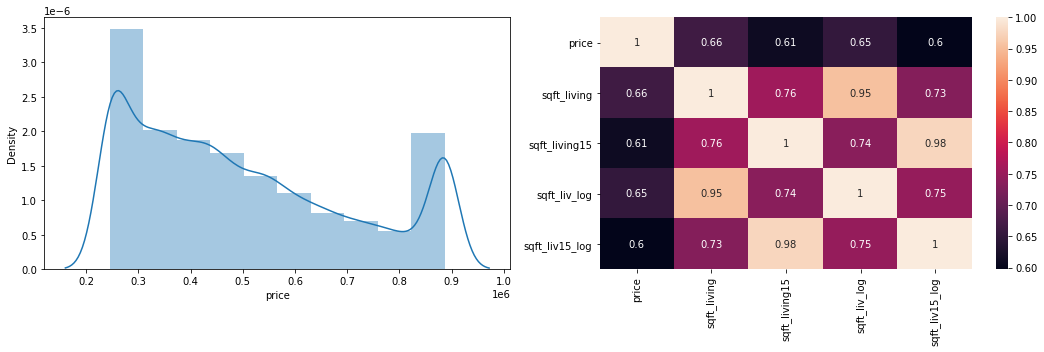

In [26]:
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(df_STD['price'], ax=axs[0], bins = 10)
sns.heatmap(df.corr(), ax=axs[1], annot=True)
fig.tight_layout()

In [27]:
yscaled_predicted = lm_scaled.predict(Xscaled_test)
residuals_scaled = yscaled_test - yscaled_predicted

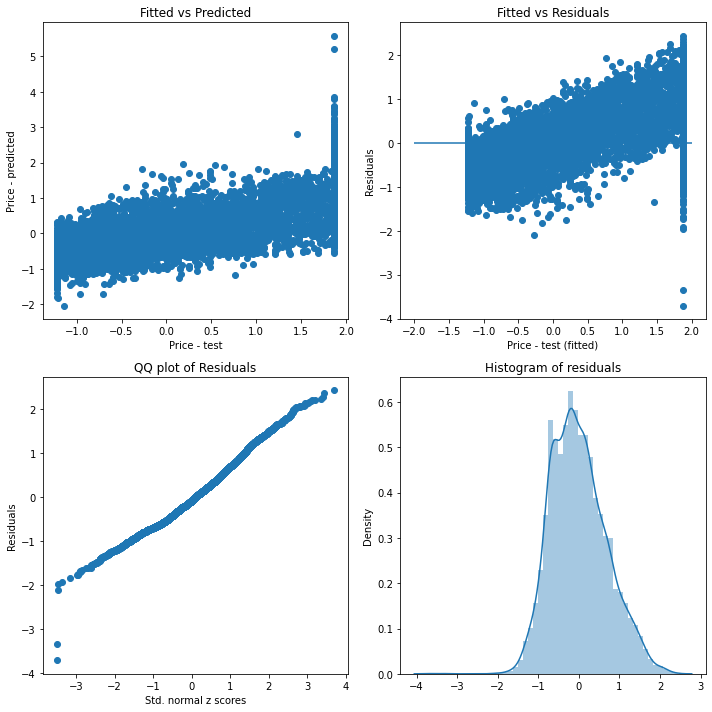

In [28]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
plt.tight_layout()

plt1 = axs[0][0].scatter(x=yscaled_test, y=yscaled_predicted)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price - test')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=yscaled_test, y=residuals_scaled)
axs[0][1].hlines(0, xmin=-2, xmax=2)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - test (fitted)')
axs[0][1].set_ylabel('Residuals')

from numpy import random
axs[1][0].scatter(x=sorted(random.randn(len(residuals_scaled))), 
                  y=sorted(residuals_scaled['price']))
axs[1][0].set_title('QQ plot of Residuals')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

sns.distplot(residuals_scaled, ax=axs[1][1])
axs[1][1].set_title('Histogram of residuals')
plt.tight_layout()

In [29]:
y1_predicted = lm1.predict(X1_test)
residuals1 = y1_test - y1_predicted



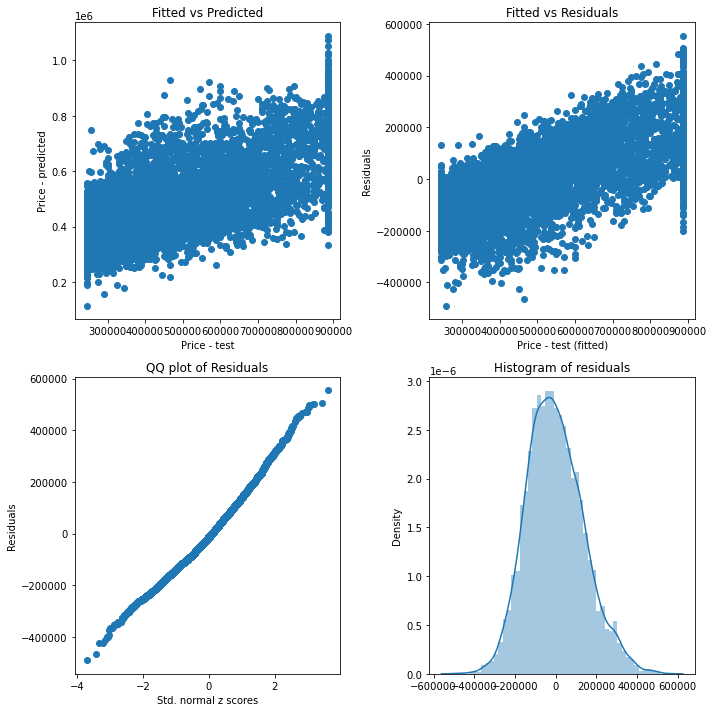

In [30]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
plt.tight_layout()

plt1 = axs[0][0].scatter(x=y1_test, y=y1_predicted)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price - test')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y1_test, y=residuals1)

axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - test (fitted)')
axs[0][1].set_ylabel('Residuals')

axs[1][0].scatter(x=sorted(random.randn(len(residuals1))), 
                  y=sorted(residuals1['price']))
axs[1][0].set_title('QQ plot of Residuals')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

sns.distplot(residuals1, ax=axs[1][1])
axs[1][1].set_title('Histogram of residuals')
plt.tight_layout()

## Conclusions
<li> Real estate agencies can measure house features to estimate the selling price and advise sellers.</li>
<li> Houses that offer more space capacity and living quality have higher prices.</li>

My analysis is consistent but with an r2 0.6 over the 3 iterations, moving forwand, it would be ideal to add at least location to have a better predicting model. 
